# P3 Concevez une application au service de la santé publique 

L'agence <span style='color:blue'> <a href = "http://www.santepubliquefrance.fr/">"*Santé publique France*" </a></span> a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. <br>
Vous souhaitez y participer et proposer une idée d’application.

Le jeu de données <font color='orange'>Open Food Facts</font> est disponible sur le <a href = "https://world.openfoodfacts.org/">site officiel</a> (ou disponible à <a href ="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip">ce lien</a> en téléchargement).
<br>
Les variables sont définies à <a href = "https://world.openfoodfacts.org/data/data-fields.txt">cette adresse</a>

Les champs sont séparés en quatre sections :

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import os

Erreur: pandas lors de l'import, certaines colonnes possèdent des valeurs de types differents:

Correction parametrer  l'argument low_memory à False

In [3]:
%%time
openfoodfacts = pd.read_csv("fr.openfoodfacts.org.products.csv",sep='\t',low_memory=False)

CPU times: total: 13 s
Wall time: 13 s


prendre 1 echant en parametre / 
figer typ de chaq col

Le code cidessous permet de créer un rapport automatisé de notre dataframe.

In [4]:
openfoodfacts.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


%%time
from pandas_profiling import ProfileReport
profile = ProfileReport(openfoodfacts.sample(int(round(openfoodfacts.shape[0]*0.01,ndigits=0))), title="Pandas Profiling Report")
profile.to_file("output.html")

In [6]:
openfoodfacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


Le fichier comtient 106 variables numeriques et 56 varriables catégoriques

In [5]:
nbLigne, nbCol = openfoodfacts.shape
nbLigne, nbCol

(320772, 162)

In [13]:
nbNaVariable = pd.DataFrame(openfoodfacts.isnull().sum().sort_values(),columns = ["Nombre NA"])

In [14]:
nbNaVariable

,Nombre NA
last_modified_t,0
last_modified_datetime,0
creator,2
created_t,3
created_datetime,9
...,...
ingredients_that_may_be_from_palm_oil,320772
ingredients_from_palm_oil,320772
no_nutriments,320772
nervonic-acid_100g,320772


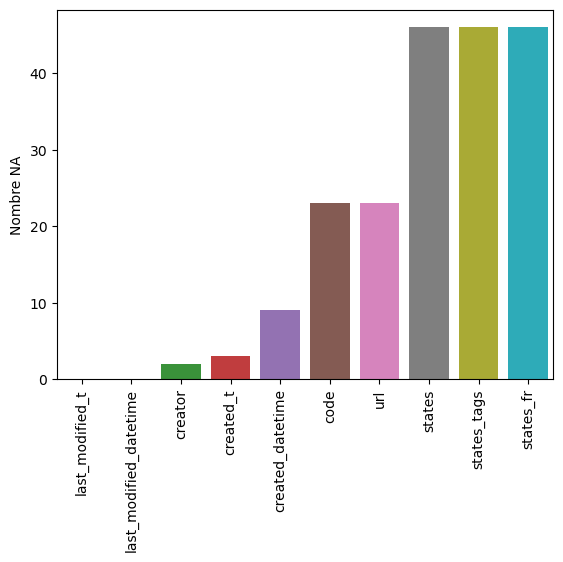

In [21]:
sns.barplot(x=nbNaVariable.index[:10],y=nbNaVariable['Nombre NA'].head(10))
plt.xticks(rotation=90);

<AxesSubplot:>

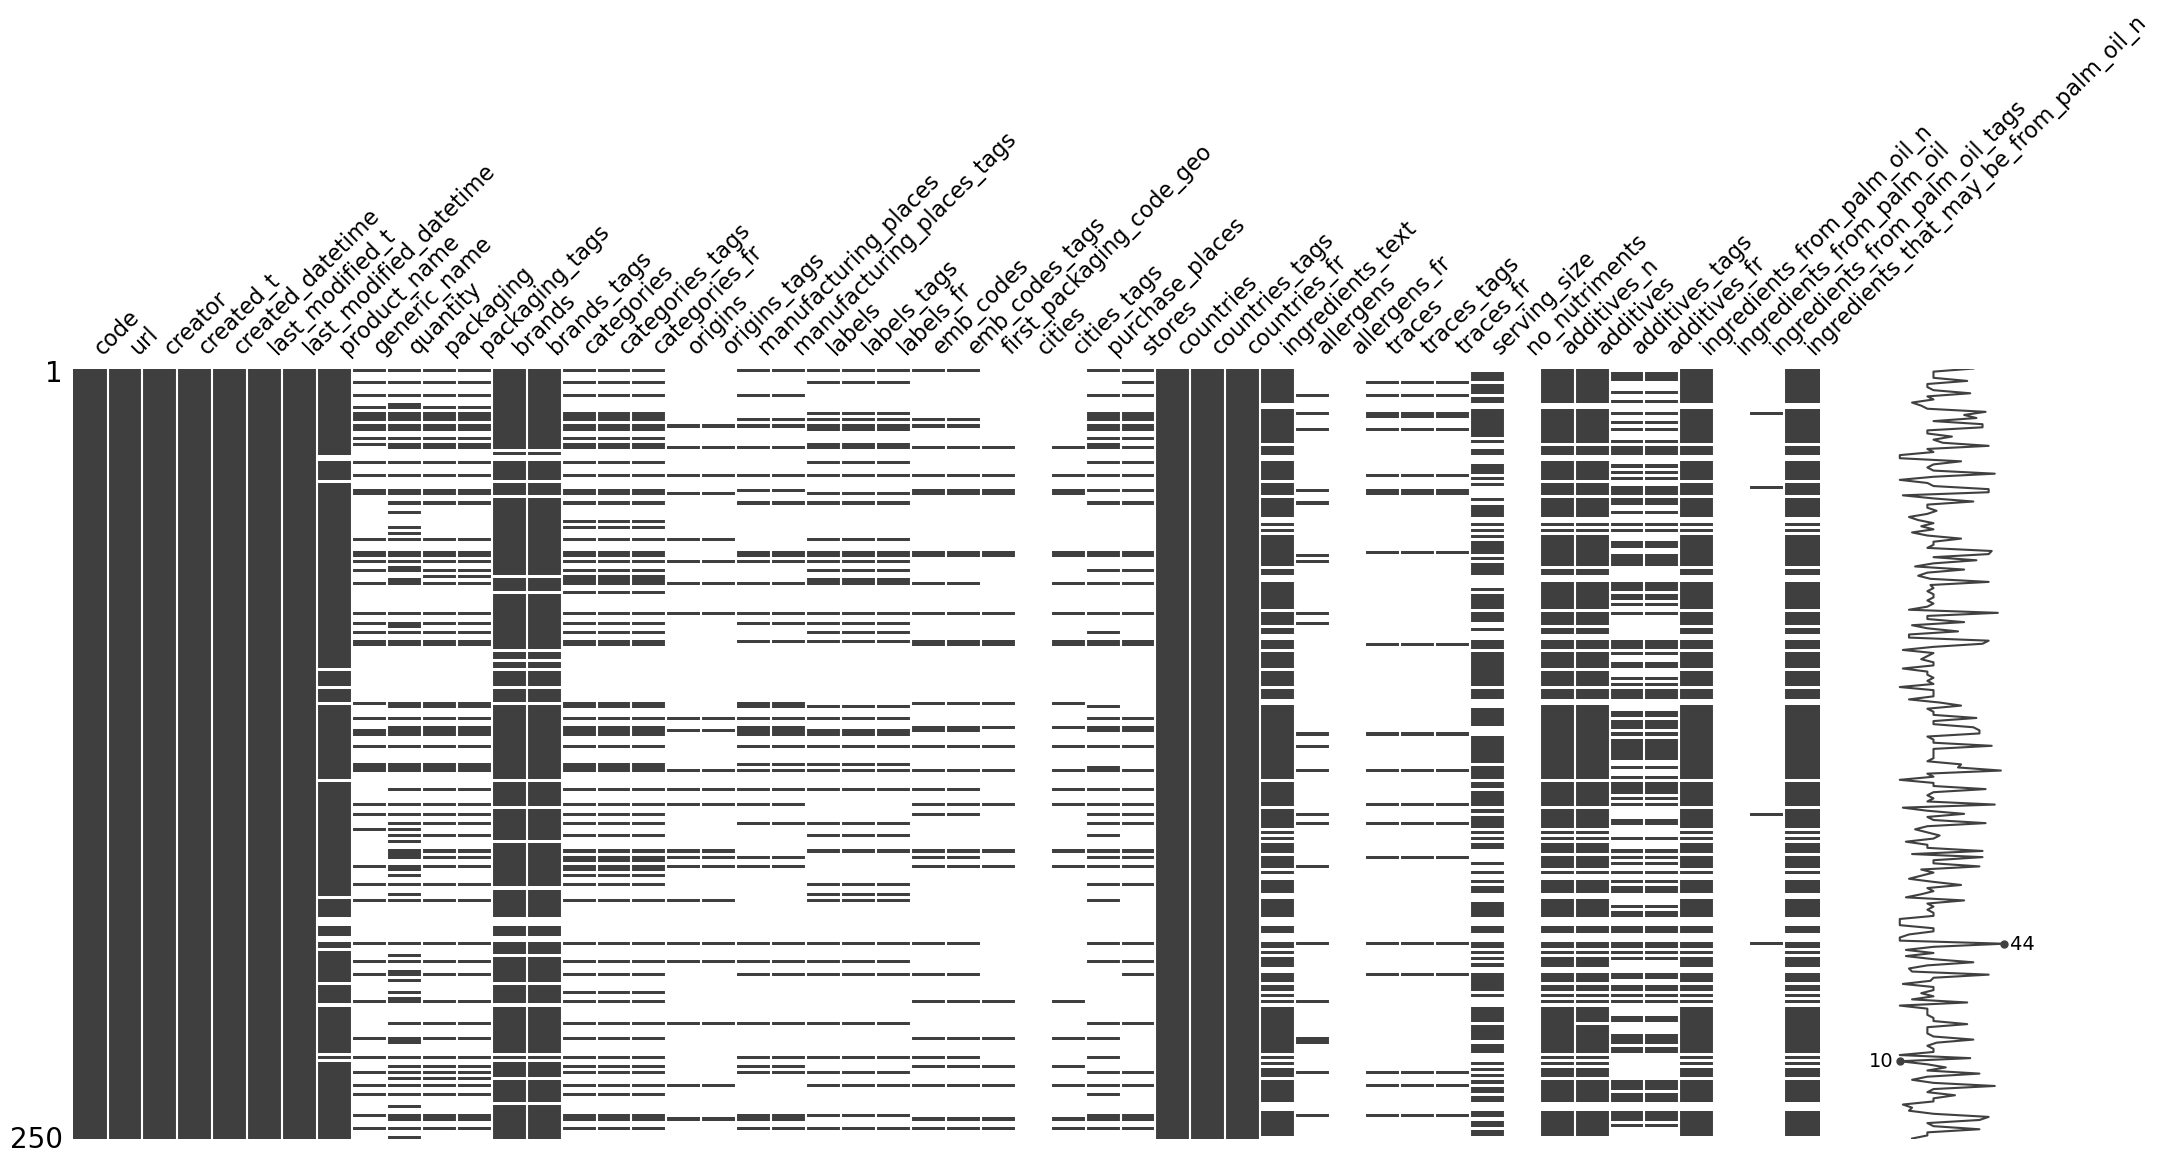

In [31]:
import missingno as msno
%matplotlib inline
msno.matrix(openfoodfacts.iloc[:,:50].sample(250))

CPU times: total: 2.12 s
Wall time: 5.16 s


<AxesSubplot:>

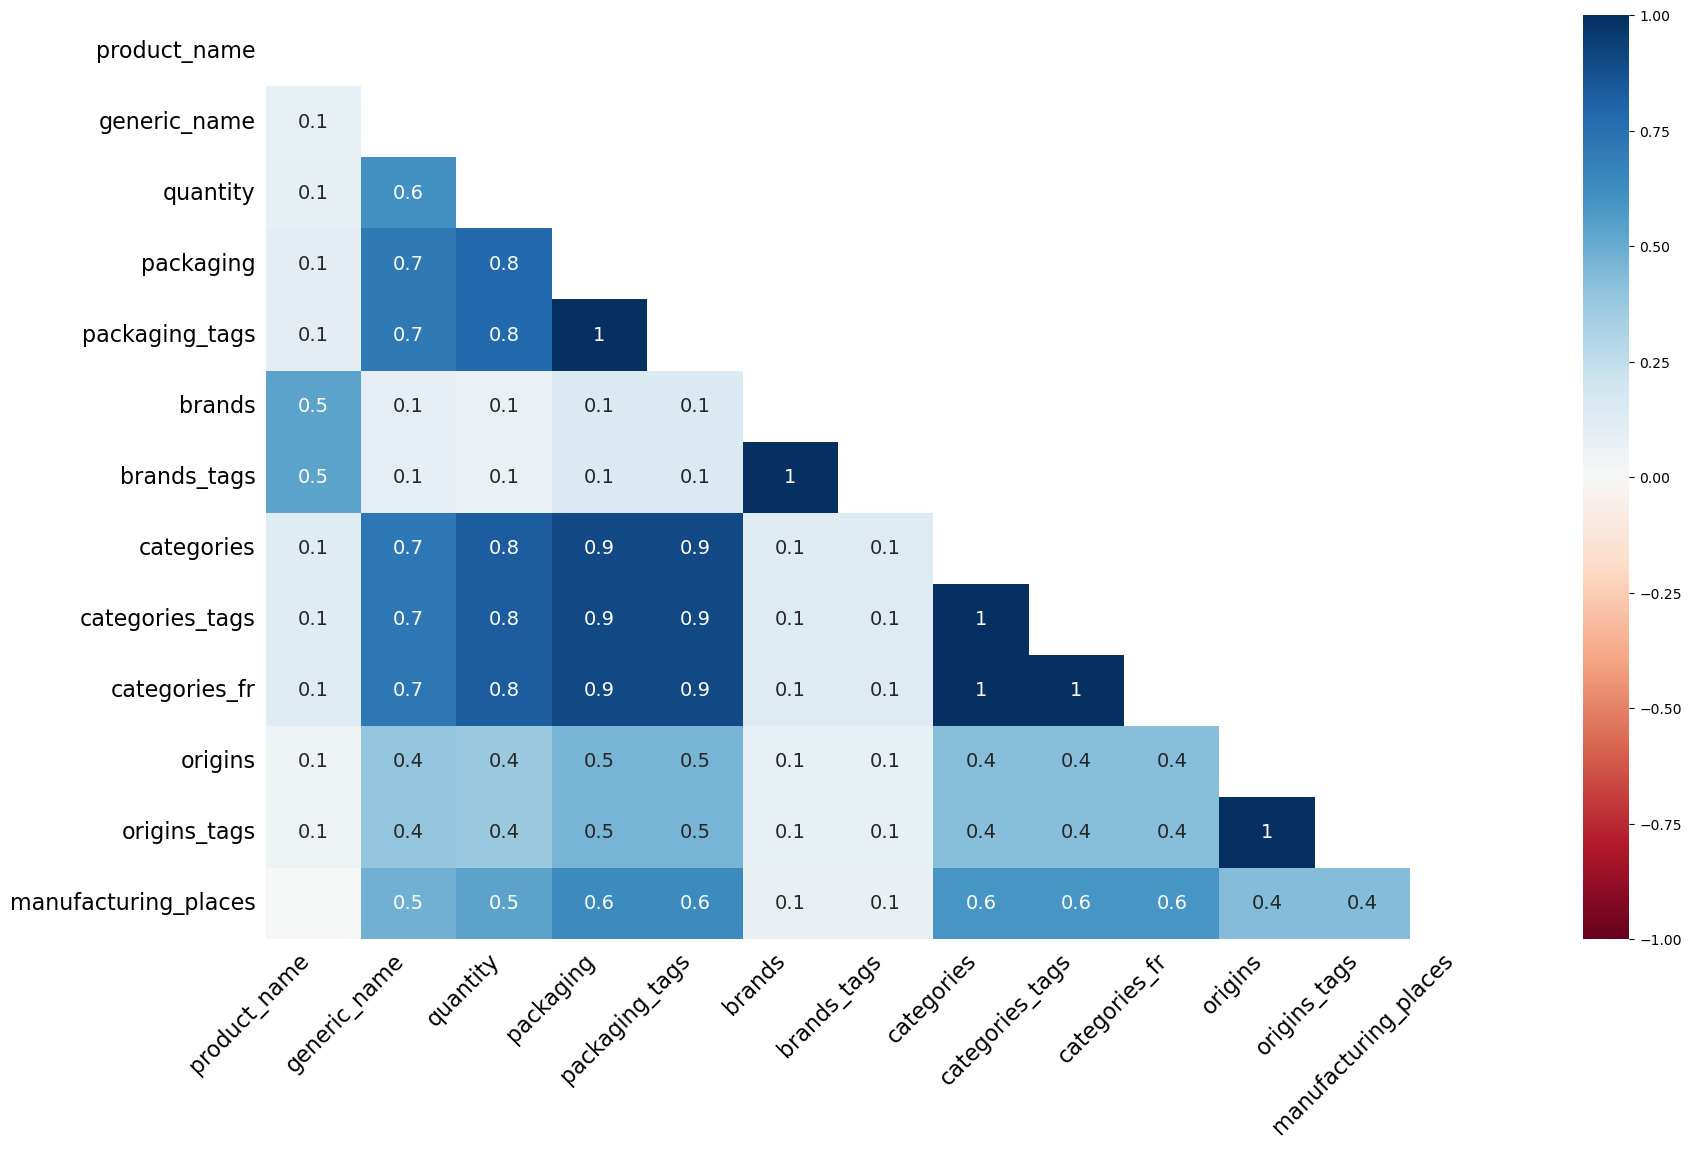

In [33]:
%%time
msno.heatmap(openfoodfacts.iloc[:,:20].sample(250));

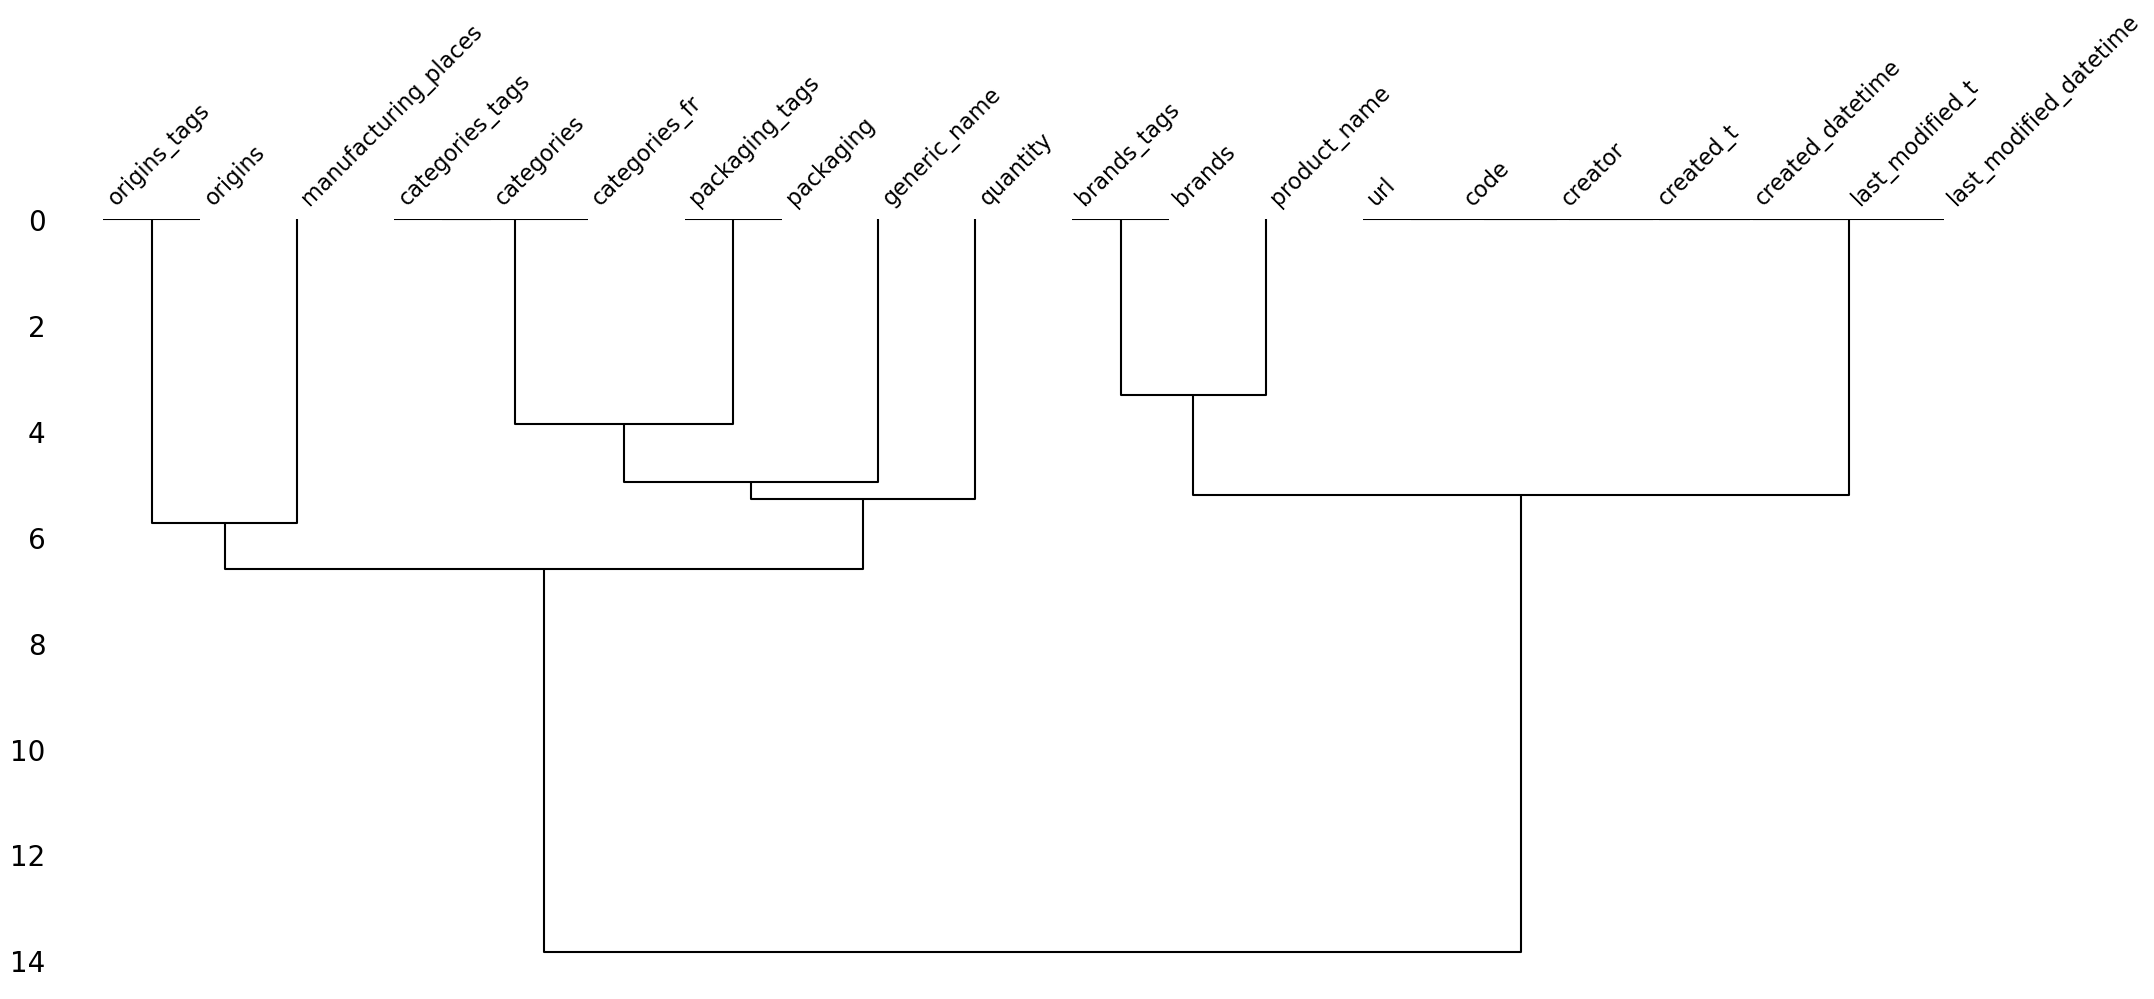

In [35]:
msno.dendrogram(openfoodfacts.iloc[:,:20].sample(250));

Detection de la clef primaire

In [25]:
openfoodfacts.code.nunique()-openfoodfacts.shape[0],openfoodfacts.url.nunique()

(-23, 320749)

In [28]:
openfoodfacts[openfoodfacts.code.isna()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France","en:belgium,en:france","Belgique,France","Lait entier, fruits : fraise (20 %), mangue (1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Villecresnes,Villeurbanne,France","Dia,Sogeres",France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France, en:switzerland","en:belgium,en:france,en:switzerland","Belgique,France,Suisse","Lait entier 69.5 %, fruits : fraise 10 %, mang...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,NaN,villecomtal-sur-arros-gers-france,"Veynes,France",SuperU,France,en:france,France,"_Lait_ entier (78%), fruits : mangue, abricot...",Lait,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,NaN,villecomtal-sur-arros-gers-france,"Torcy 77,France",Carrefour,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,France,en:france,France,"_Lait_ écrémé, fruits : fraise (12 %), cerise ...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,NaN,villecomtal-sur-arros-gers-france,"Saint-Priest,France",Auchan,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,NaN,France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème, lactiques",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, rhubarbe (8 %), sucre (8 %), la...","Lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, ananas (8 %), sucre (7,1 %), _l...","Lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
passe =0
for k in openfoodfacts.columns:
    for l in k.split('_'):
        if l.lower() == 'energy':
            print(k)
            passe=1
            continue
    if passe == 1:
        passe = 0
        continue


energy_100g


In [15]:
'collagen-meat-protein-ratio_100g'.split('-')

['collagen', 'meat', 'protein', 'ratio_100g']

In [21]:
def findTrueFalse(pattern, x) : 
    if re.match(pattern, x)==None:
        return False
    else:
        return True
    
import re
list(map(findTrueFalse ,openfoodfacts.columns,['_100g'] ) )
#openfoodfacts.columns[list(map(findTrueFalse ,'_100g',openfoodfacts.columns ) )]

[False]

In [14]:
openfoodfacts[['nutrition-score-fr_100g','fruits-vegetables-nuts_100g','collagen-meat-protein-ratio_100g','carbon-footprint_100g','proteins_100g','energy-from-fat_100g','energy_100g','sugars_100g','saturated-fat_100g','fiber_100g','sodium_100g','chloride_100g']]\
.corr().style.background_gradient(cmap='Blues').format("{:.2%}")

,nutrition-score-fr_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,carbon-footprint_100g,proteins_100g,energy-from-fat_100g,energy_100g,sugars_100g,saturated-fat_100g,fiber_100g,sodium_100g,chloride_100g
nutrition-score-fr_100g,100.00%,-29.37%,61.34%,38.66%,10.84%,55.24%,6.78%,44.15%,62.42%,-4.70%,0.73%,89.30%
fruits-vegetables-nuts_100g,-29.37%,100.00%,nan%,-70.42%,-34.08%,-100.00%,-26.30%,15.25%,-27.25%,-2.83%,-9.08%,nan%
collagen-meat-protein-ratio_100g,61.34%,nan%,100.00%,nan%,-57.60%,nan%,30.71%,36.39%,59.74%,23.70%,45.19%,nan%
carbon-footprint_100g,38.66%,-70.42%,nan%,100.00%,37.40%,nan%,17.62%,9.76%,22.96%,4.29%,40.90%,nan%
proteins_100g,10.84%,-34.08%,-57.60%,37.40%,100.00%,8.79%,4.48%,-21.08%,16.64%,19.23%,-0.23%,68.79%
energy-from-fat_100g,55.24%,-100.00%,nan%,nan%,8.79%,100.00%,76.99%,-4.01%,71.51%,7.48%,-1.73%,nan%
energy_100g,6.78%,-26.30%,30.71%,17.62%,4.48%,76.99%,100.00%,5.69%,7.37%,7.75%,-0.06%,82.72%
sugars_100g,44.15%,15.25%,36.39%,9.76%,-21.08%,-4.01%,5.69%,100.00%,15.66%,34.46%,0.04%,81.53%
saturated-fat_100g,62.42%,-27.25%,59.74%,22.96%,16.64%,71.51%,7.37%,15.66%,100.00%,15.46%,-0.22%,91.42%
fiber_100g,-4.70%,-2.83%,23.70%,4.29%,19.23%,7.48%,7.75%,34.46%,15.46%,100.00%,-0.01%,29.06%


# Etude des types de variables

In [17]:
nomColonnes = openfoodfacts.columns

In [18]:
np.sum('brands'==nomColonnes)

1

In [19]:
openfoodfacts.columns[0:40]

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'allergens_fr', 'traces', 'traces_tags', 'traces_fr'],
      dtype='object')

In [22]:
colGarder = ['code', 'url', 'creator', 'created_datetime',
             'last_modified_datetime', 'product_name','generic_name', 'quantity', 
             'packaging_tags', 
             'brands', 
             'categories_fr',
             'origins', 
             'manufacturing_places', 
             'labels_fr',
             'emb_codes', 
             'first_packaging_code_geo', 
             'cities','cities_tags', 
             'purchase_places', 'stores', 
             'countries_fr', 
             'ingredients_text', 
             'allergens', 
             'traces']

In [20]:
openfoodfacts.isnull().sum()/openfoodfacts.shape[0]

code                       0.000072
url                        0.000072
creator                    0.000006
created_t                  0.000009
created_datetime           0.000028
                             ...   
carbon-footprint_100g      0.999165
nutrition-score-fr_100g    0.310382
nutrition-score-uk_100g    0.310382
glycemic-index_100g        1.000000
water-hardness_100g        1.000000
Length: 162, dtype: float64

In [23]:
openfoodfacts[colGarder].sample(5)

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands,...,emb_codes,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries_fr,ingredients_text,allergens,traces
165211,0857529006330,http://world-fr.openfoodfacts.org/produit/0857...,usda-ndb-import,2017-03-09T16:40:34Z,2017-03-09T16:40:34Z,"Probiotic Water, Orange Ginger Pineapple",NaN,NaN,NaN,"Suja, Suja Life Llc",...,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,"Water, organic orange juice, organic ginger ju...",NaN,NaN
184796,26033174,http://world-fr.openfoodfacts.org/produit/2603...,openfoodfacts-contributors,2014-08-17T12:25:01Z,2014-10-01T10:12:32Z,Cappuccino,Cappuccino nature,250 g,"boite-ronde-carton,plastique",Summa,...,NaN,NaN,NaN,NaN,"bollene,france",Aldi,France,"sucre, poudre de lait écrémé,café soluble (l6%...",NaN,NaN
292935,7613035604056,http://world-fr.openfoodfacts.org/produit/7613...,openfood-ch-import,2017-02-07T23:21:15Z,2017-02-07T23:21:16Z,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Suisse,"Pommes 85,9%, mangues 14%, vitamine C.",NaN,NaN
41017,0041250691570,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,2017-03-09T11:10:07Z,2017-03-09T11:10:07Z,"Pudding & Pie Filling, Chocolate",NaN,NaN,NaN,Meijer,...,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,"Food starch-modified, maltodextrin (from tapio...",NaN,NaN
7709,0011213025117,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09T12:33:03Z,2017-03-09T12:33:03Z,Grill Style Beans,NaN,NaN,NaN,Spartan,...,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,"Prepared white beans, water, brown sugar, cont...",NaN,NaN


In [24]:
openfoodfacts[colGarder].isnull().sum()/len(openfoodfacts)

code                        0.000072
url                         0.000072
creator                     0.000006
created_datetime            0.000028
last_modified_datetime      0.000000
product_name                0.055373
generic_name                0.835413
quantity                    0.673229
packaging_tags              0.753841
brands                      0.088574
categories_fr               0.736850
origins                     0.930823
manufacturing_places        0.886209
labels_fr                   0.854520
emb_codes                   0.908639
first_packaging_code_geo    0.941382
cities                      0.999928
cities_tags                 0.936653
purchase_places             0.818585
stores                      0.838758
countries_fr                0.000873
ingredients_text            0.223866
allergens                   0.911638
traces                      0.924080
dtype: float64

In [25]:
valManquantes = openfoodfacts.isnull().sum()/len(openfoodfacts)

In [26]:
colToDropAllNa = valManquantes.index[valManquantes==1]

In [27]:
#doublon
openfoodfacts.drop(columns=colToDropAllNa,inplace=False).duplicated().sum()

0

In [100]:
openfoodfacts[['emb_codes', 'emb_codes_tags']].isnull().sum()

emb_codes         291466
emb_codes_tags    291469
dtype: int64

In [97]:
openfoodfacts[~openfoodfacts[['traces']].isna()].iloc[:,:40].sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr
156354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
pd.DataFrame( map(round(number=2),openfoodfacts[openfoodfacts.columns[:40]].isnull().sum()/320772) )

TypeError: 'int' object is not callable

In [ ]:
openfoodfacts.to_csv('openfoodfacts_cleaned.csv')